This notebook introduces the use of dictionaries for counting the frequency of some category of words in text, using sentiment (from the [AFINN sentiment lexicon](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010)) in the time series data of tweets as an example.

This notebook uses data from the AFINN sentiment lexicon; for other dictionaries in wide use, see [MPQA](https://mpqa.cs.pitt.edu/lexicons/subj_lexicon/) (free for use with registration) and [LIWC](http://liwc.wpengine.com) (commercial).

Before running this notebook, install pandas:

```sh
source activate anlp
conda install pandas=0.24.0
conda install matplotlib=3.0.2
```

In [1]:
import json
import nltk
import pandas as pd
import matplotlib

In [2]:
# read in json file of tweets and return a list of (date, tokenized text)
def read_tweets_from_json(filename):
    
    tweets=[]
    with open(filename, encoding="utf-8") as file:
        data=json.load(file)
        for tweet in data:
            created_at=tweet["created_at"]
            date = pd.to_datetime(created_at)
            text=tweet["text"]
            tokens=nltk.casual_tokenize(text)
            tweets.append((date, tokens))
    return tweets

In [3]:
# read in list of (date, tokens) tweets and count whether each tweet contains 
# a (lowercased) term in the argument dictionary.  Return as pandas dataframe
# for easier slicing/plotting)
def dictionary_document_count(data, dictionary):
    counted=[]
    for date, tokens in data:
        val=0
        for word in tokens:
            if word.lower() in dictionary:
                val=1
        counted.append((date, val))
    df=pd.DataFrame(counted, columns=['date','document frequency'])
    return df

In [4]:
tweets=read_tweets_from_json("../data/trump_tweets.json")

Here we'll define our own "immigration" dictionary by selecting words that we hypothesize are often found in the topic of immigration.

In [5]:
immigration_dictionary=set(["wall", "border", "borders", "immigrants","immigration"])

In [6]:
counts=dictionary_document_count(tweets, immigration_dictionary)

In [7]:
def plot_time(counts):
    
    # for this exercise, let's just keep tweets published after 2015
    counts=counts[(counts['date'] > '2015-01-01')]
    
    # counts is a pandas dataframe; let's aggregate the counts by month.  
    # Can also aggregate by "D" for day, "W" for week, "Y" for year.
    means=counts.resample('M', on='date').mean() 
    
    means.plot()

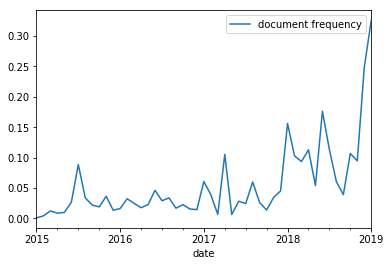

In [10]:
# You might need to run this command twice if you get a warning
plot_time(counts)

Q1: The AFINN dictionary is a sentiment lexicon, where words are rated on a five-point affect scale (-5 = most negative, 5 = most positive).  Write a function `read_AFINN_dictionary` to read in this file and create two dictionaries like that above -- one for positive terms and one for negative terms.  How did you decide the cutoff point for positive and negative?

In [11]:
def read_AFINN_dictionary(filename):
    positive=[]
    negative=[]
    with open(filename) as file:
        for line in file:
            cols=line.rstrip().split("\t")
            word=cols[0]
            value=int(cols[1])
            if value <= -2:
                negative.append(word)
            elif value >= 2:
                positive.append(word)
    
    return set(positive), set(negative)

In [12]:
positive, negative=read_AFINN_dictionary("../data/AFINN-111.txt")

Q2: Create a plot (like that above) using the negative sentiment dictionary you created

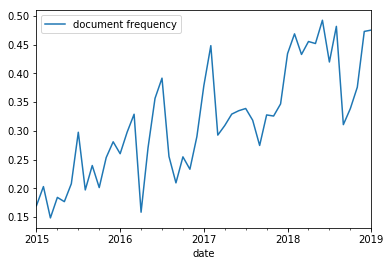

In [13]:
counts=dictionary_document_count(tweets, negative)
plot_time(counts)

Q3: Create a new dictionary of your own for a concept you'd like to measure in `trump_tweets.json` or `aoc_tweets.json`.  The dictionary must contain at least 10 terms; you're free to create one for any category (except sentiment!), so be creative--we'll be comparing these in class on Thursday. Create a plot using that dictionary and data below.

Q4 (check-plus): for each of the terms in your dictionary, write a function `print_examples(tweets, dictionary)` to find one tweet that contains that term and print it out for your inspection.  Is that term used in the same sense you expected?

In [14]:
def print_examples(data, dictionary):
    for term in dictionary:
        flag=False
        for (date, tokens) in data:
            for word in tokens:
                if word.lower() == term.lower():
                    print ("%s\t%s" % (term,' '.join(tokens)))
                    flag=True
                    break
            if flag:
                break

In [15]:
print_examples(tweets, immigration_dictionary)

border	Mexico is doing NOTHING to stop the Caravan which is now fully formed and heading to the United States . We stopped the last two - many are still in Mexico but can ’ t get through our Wall , but it takes a lot of Border Agents if there is no Wall . Not easy !
immigrants	RT @Lrihendry : @realDonaldTrump They are eaten alive by hate for our President & his voters ! They care more about illegal immigrants than …
borders	It is becoming more and more obvious that the Radical Democrats are a Party of open borders and crime . They want nothing to do with the major Humanitarian Crisis on our Southern Border . #2020 !
immigration	RT @charliekirk11 : This is why we need a wall Illegal immigration is a serious threat to our country 90 % of all heroin comes across the b …
wall	Mexico is doing NOTHING to stop the Caravan which is now fully formed and heading to the United States . We stopped the last two - many are still in Mexico but can ’ t get through our Wall , but it takes a lot of Bord